### Import necessary packages and the Kaggle house prices dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())

from tabularmagic import TabularMagic
from tabularmagic.ml_models import Linear, Tree, TreeEnsemble, SVM, MLP
from tabularmagic.preprocessing.regression_feature_selection import KBestSelector, L1RegSelector

df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


### Create a TabularMagic object

In [2]:
tm = TabularMagic(df=df_train, test_size=0)

### View summary statistics of the training dataset

In [3]:
display(tm.train_eda.continuous_summary_statistics)
display(tm.train_eda.categorical_summary_statistics)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,20.000000,21.000000,1.300000e+03,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,3.490000e+04
max,190.000000,313.000000,2.152450e+05,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,7.550000e+05
mean,56.897260,70.049958,1.051683e+04,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,1.809212e+05
variance,1789.338306,589.749169,9.962565e+07,1.912679,1.238322,912.215413,426.232822,32784.971168,208025.468469,26023.907779,195246.406179,192462.361709,149450.079204,190557.075337,2364.204048,276129.633363,0.269268,0.057003,0.303508,0.252894,0.665494,0.048549,2.641903,0.415595,609.582509,0.558480,45712.510229,15709.813370,4389.861203,3735.550326,859.505871,3108.889359,1614.215993,246138.055397,7.309595,1.763837,6.311111e+09
skew,1.406210,2.160866,1.219514e+01,0.216721,0.692355,-0.612831,-0.503044,2.666326,1.683771,4.250888,0.919323,1.522688,1.375342,0.812194,9.002080,1.365156,0.595454,4.099186,0.036524,0.675203,0.211572,4.483784,0.675646,0.648898,-0.648708,-0.342197,0.179796,1.539792,2.361912,3.086696,10.293752,4.117977,14.813135,24.451640,0.211835,0.096170,1.880941e+00
kurtosis,1.570675,17.375300,2.025438e+02,0.091857,1.098521,-0.442155,-1.271999,10.043602,11.076090,20.040415,0.469262,13.201042,5.722076,-0.555677,82.945932,4.874266,-0.840334,16.336436,-0.858217,-1.077349,2.219135,21.454627,0.873641,-0.220601,-0.421174,0.216135,0.909823,2.978604,8.457180,10.390972,123.235177,18.371874,222.500507,698.600840,-0.406834,-1.190634,6.509812e+00
q1,20.000000,59.000000,7.553500e+03,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.299750e+05
median,50.000000,69.000000,9.478500e+03,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.630000e+05
q3,70.000000,80.000000,1.160150e+04,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2.140000e+05


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique_vals,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common_val,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
least_common_val,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,PosA,2fmCon,2.5Fin,Shed,Metal,AsphShn,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,Mix,Fa,Sev,Po,2Types,Fin,Ex,Ex,P,Ex,MnWw,TenC,Con,AdjLand
n_missing_samples,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,872,0,0,0,37,37,38,37,38,0,0,0,1,0,0,690,81,81,81,81,0,1453,1179,1406,0,0
n_samples,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


### View the distributions of target variable

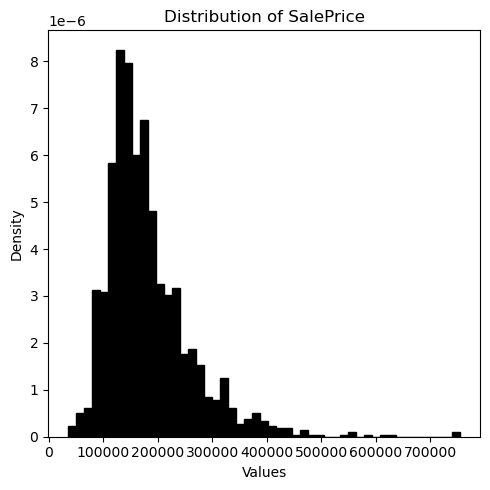

In [4]:
fig = tm.train_eda['SalePrice'].plot_distribution()    # create a Figure
display(fig)    # diplay the Figure
plt.close(fig)  # close the Figure to conserve memory

### 

### Preprocess data and impute the NaNs

In [5]:
tm.reset_working_dfs()
tm.preprocess_data(onehot_vars=tm.train_eda.categorical_columns.to_list(), 
                   minmax_vars=tm.train_eda.continuous_columns.to_list(),
                   imputation_strategy='10nn')

### Select top 10 features

In [6]:
selectors = [
    KBestSelector('r_regression'),
    KBestSelector('f_regression'),
    KBestSelector('mutual_info_regression'),
    L1RegSelector(1.0)
]

feature_selection_report = tm.voting_selection(
    X_vars=tm.train_eda.continuous_columns[:-1], y_var='SalePrice', 
    selectors=selectors, n_target_features=10)
print(feature_selection_report.top_features)

['FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'GarageCars', 'YearBuilt', 'GrLivArea', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd']


### Model benchmarking exercise

In [7]:
models = [
    # All models have default hyperparameter search methods built in.
    Linear(regularization_type=None, n_jobs=-1),
    Linear(regularization_type='l1', n_jobs=-1, random_state=42),
    Linear(regularization_type='l2', n_jobs=-1, random_state=42),
    Tree(n_jobs=-1),
    TreeEnsemble(ensemble_type='random_forest', n_jobs=-1),
    TreeEnsemble(ensemble_type='bagging', n_jobs=-1),
    TreeEnsemble(ensemble_type='gradient_boosting', n_jobs=-1),

    # You can manually set the nickname of a model
    SVM(kernel='rbf', nickname='SupportVectorMachine', n_jobs=-1),
    
    # You can specify the hypeparameter search method in an sklearn-like manner. 
    MLP(
        hyperparam_search_method='grid',
        hyperparam_grid_specification={
            'hidden_layer_sizes': [(50), (100), (50, 50)],
            'activation': ['relu'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
            'max_iter': [200]
        },
        n_jobs=-1
    )
]

train_report, test_report = tm.ml_regression_benchmarking(
    X_vars=feature_selection_report.top_features,
    y_var='SalePrice',
    models=models
)

Task 1 of 9.	Training Linear(None).


Task 2 of 9.	Training Linear(l1).
Task 3 of 9.	Training Linear(l2).
Task 4 of 9.	Training Tree.
Task 5 of 9.	Training TreeEnsemble(random_forest).
Task 6 of 9.	Training TreeEnsemble(bagging).
Task 7 of 9.	Training TreeEnsemble(gradient_boosting).
Task 8 of 9.	Training SupportVectorMachine.
Task 9 of 9.	Training MLP.


### Compare the fit statistics between models on the train data

In [8]:
display(test_report.fit_statistics)

,Linear(None),Linear(l1),Linear(l2),Tree,TreeEnsemble(random_forest),TreeEnsemble(bagging),TreeEnsemble(gradient_boosting),SupportVectorMachine,MLP
Statistic,,,,,,,,,
mse,1.427271e+09,1.434540e+09,1.434288e+09,1.286063e+09,1.328308e+08,1.319696e+06,4.570326e+08,1.084016e+09,1.193907e+09
mad,2.384023e+04,2.396812e+04,2.391784e+04,2.210060e+04,7.166787e+03,4.043265e+02,1.541315e+04,2.386680e+04,2.249757e+04
pearsonr,8.795981e-01,8.790766e-01,8.790358e-01,8.922347e-01,9.904592e-01,9.998961e-01,9.632623e-01,9.147232e-01,9.027563e-01
spearmanr,9.223954e-01,9.214786e-01,9.213940e-01,9.176706e-01,9.892619e-01,9.997521e-01,9.463175e-01,8.895684e-01,9.130917e-01
r2,7.074974e-01,6.951119e-01,6.980975e-01,7.438492e-01,9.764132e-01,9.997902e-01,9.188174e-01,8.062783e-01,7.702877e-01
adjr2,7.054788e-01,6.930078e-01,6.960140e-01,7.420814e-01,9.762505e-01,9.997888e-01,9.182571e-01,8.049413e-01,7.687024e-01


### Plot the SVM fit on the train data

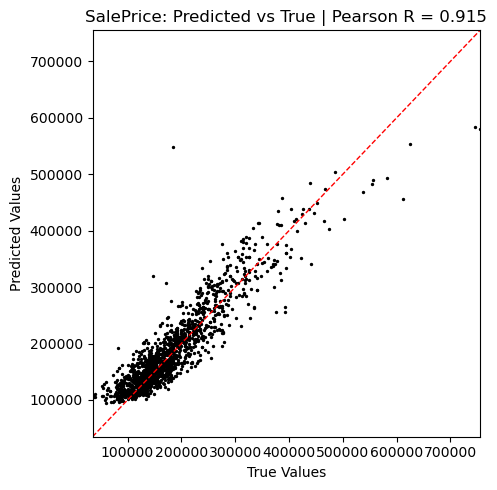

In [9]:
fig = test_report['SupportVectorMachine'].plot_pred_vs_true()